In [13]:
#change the dataset into Pandas dataframe
import pandas as pd
dataset = pd.read_csv("Kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")
#anyway check the raw data
dataset.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#check the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [3]:
#As you know, there are 26 alphabets from A to Z. 
#The first colummn shows labels comprised of "0 to 25", in short, the correct answers.
#For example, "0" is "A". "25" is "Z".
#Process loading dataset and change it into float 32 data, and name the first colummn "label".
dataset.astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
# Now X is "Explanatory variable", y is "Taget".
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [4]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

D:\Program Files\anaconda3\envs\JP_OCR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

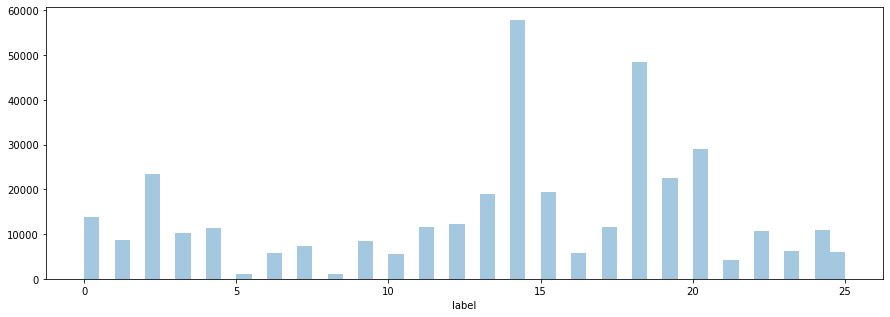

In [5]:
#import two libraries, matplot, seaborn.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.distplot(y,kde=False)

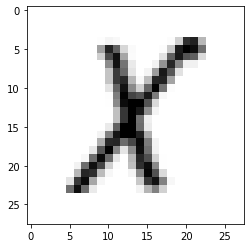

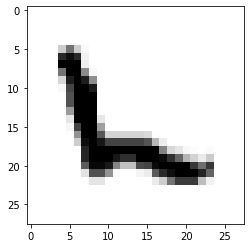

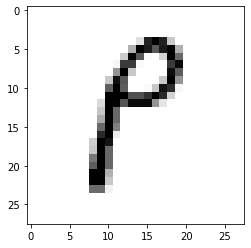

In [6]:
#import numpy and give a seed. 
import numpy as np
np.random.seed(2)
#Show 3 letter at random and convert them into gray scale letters. 
for i in range(3):
    plt.imshow(X.iloc[np.random.randint(0,372449)].values.reshape(28,28),cmap='Greys')
    plt.show()

In [7]:
# load some libraries that I frequently use. 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
#Now, reload the dataset and change it into "numpy array".
dataset = np.loadtxt('Kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv', delimiter=',')
#Divide dataset into two parts, one is "Explanatory variable", the other is "Taget".
X = dataset[:,0:784]
Y = dataset[:,0]
#Split the "X,Y" data into the ratio of 7:3, 3 is the test size. 
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state=2)
#Reshape the data and change it into float 32 as usual.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
#The pixcel of the data is comprised from 0 to 255. 0 is white,255 is black.
#Now normalize the data from 0 to 1 without some libraries, in a simple way.
X_train = X_train / 255
X_test = X_test / 255

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv'